In [ ]:
import numpy as np
import pandas as pd


# Plotly Packages
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats


# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Colab Notebooks/.kaggle'
# '/content/drive/My Drive/Colab Notebooks' is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
%pwd

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
import numpy as np
import pandas as pd
seed = 7
np.random.seed(seed)

from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# insurance.csv 파일을 pandas dataframe으로 읽기
df = pd.read_csv('/content/insurance.csv')
df.head()

original_df = df.copy()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumMyeongjo Eco /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
Nanum Brush Script /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumGothic Eco /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareL.ttf
NanumGothic /usr/share/fonts

In [ ]:
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumSquare


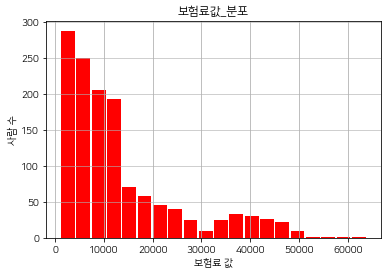

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

charge_dist =df['charges']
logcharge = np.log(df["charges"])

charge_dist.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='r')

plt.title('보험료값_분포')
plt.xlabel('보험료 값')
plt.ylabel('사람 수')
plt.grid(axis='y', alpha=0.75)


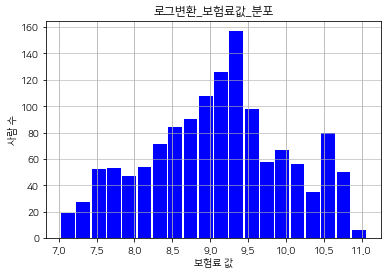

In [ ]:
logcharge.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='b')
plt.title('로그변환_보험료값_분포')
plt.xlabel('보험료 값')
plt.ylabel('사람 수')
plt.grid(axis='y', alpha=0.75)

분포 유형 : 우리는 대부분의 환자가 2000-12000 사이에 청구되는 오른쪽으로 치우친 분포를 가지고 있습니다.
Logarithms 사용 : Logarithms는 이상 값 감지, 중앙 한계 정리에 기반한 통계적 개념 구현 및 예측 된 미래의 예측 모델과 같은 다양한 방식으로 우리를 도울 수있는 정규 분포를 갖도록 도와줍니다. (나중에 커널에서 다룰 것입니다)

([<matplotlib.patches.Wedge at 0x7f50dbfaad50>,
 [Text(-0.37217431541881063, 1.0351262140157305, 'Young Adult'),
  Text(-0.177432745296642, -1.0855955144051108, 'Senior Adult'),
  Text(0.9615386288881823, -0.5342690943296595, 'Elder')],
 [Text(-0.20300417204662397, 0.5646142985540348, '61.0%'),
  Text(-0.09678149743453199, -0.5921430078573331, '22.9%'),
  Text(0.5244756157571903, -0.29141950599799604, '16.1%')])

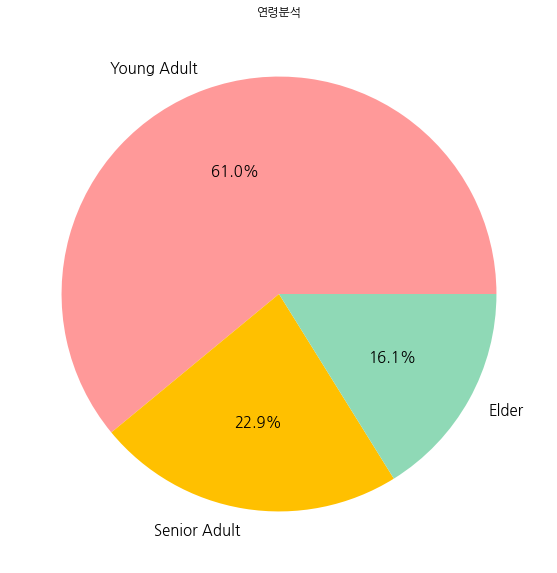

In [ ]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family'] = 'NanumGothic'

%matplotlib inline

df['age_cat'] = np.nan
lst = [df]


for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 25), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 25) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

label = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()
colors = ['#ff9999', '#ffc000', '#8fd9b6']

plt.figure(figsize=(10,10))
plt.title('연령분석')
plt.pie(amount, labels=label, autopct='%0.1f%%', colors = colors, textprops = {'fontsize':15})

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Senior Adult
3,33,male,22.705,0,no,northwest,21984.47061,Senior Adult
4,32,male,28.880,0,no,northwest,3866.85520,Senior Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


연령 분석 :

연령을 범주 형 변수로 전환 :
청소년 : 18 ~ 35 세
노인 : 36-55
노인 : 56 세 이상
카테고리 별 비중 : 청년 (42.9 %), 노인 (41 %), 노인 (16.1 %)

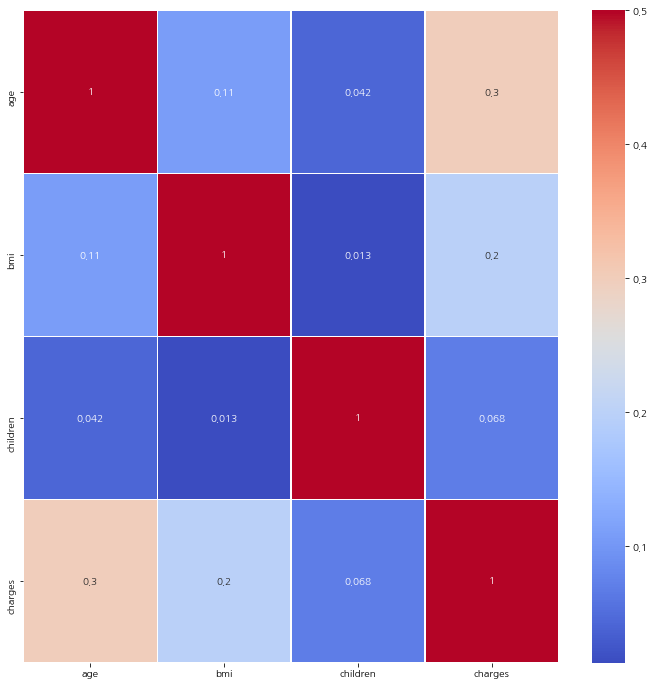

In [ ]:
# 객체간 연관
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap="coolwarm", linecolor='white', annot=True)
plt.show()

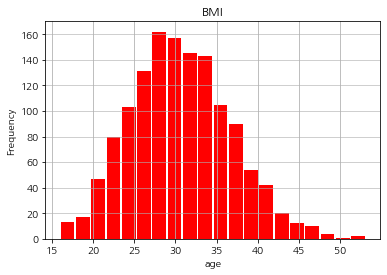

In [ ]:
charge_dist =df['bmi']

charge_dist.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='r')

plt.title('BMI')
plt.xlabel('age')
plt.grid(axis='y', alpha=0.75)

BMI와 나이 사이에 관계가 있습니까?
BMI 주파수 : 대부분의 BMI 주파수는 27-33 사이에 집중되어 있습니다.
상관 관계 연령과 전하의 상관 관계는 0.29이고 bmi와 전하의 상관 관계는 0.19입니다.
BMI와 연령 사이의 관계 :이 두 변수의 상관 관계는 0.10으로 그다지 크지 않습니다. 따라서 우리는 나이가 BMI에 큰 영향을 미친다는 것을 무시할 수 있습니다.

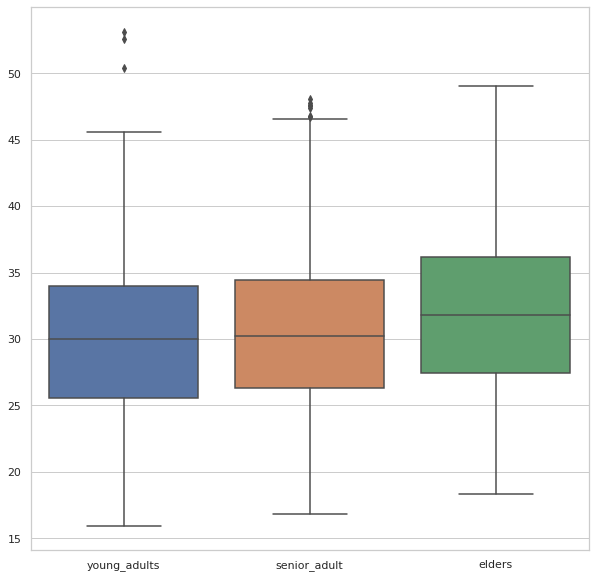

In [ ]:
import sklearn
young_adults = df["bmi"].loc[df["age_cat"] == "Young Adult"].values
senior_adult = df["bmi"].loc[df["age_cat"] == "Senior Adult"].values
elders = df["bmi"].loc[df["age_cat"] == "Elder"].values

#data = pd.DataFrame([[data3]], columns = ['Young Adult', 'Senior Adult', 'Elde'], dtype = float)
data2 = pd.DataFrame([young_adults, senior_adult, elders])
data3 = data2.T
data3.columns = ["young_adults","senior_adult","elders"]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
sns.boxplot(data=data3)
#data3.boxplot()


독립 범주 형 변수 (ANOVA) 비교
p- 값 : 0.05보다 큰 p- 값은 우리가 Null 가설을 취한다는 것을 의미합니다. 즉, 체질량 지수와 관련하여 세 연령 범주간에 큰 변화가 없음을 의미합니다.

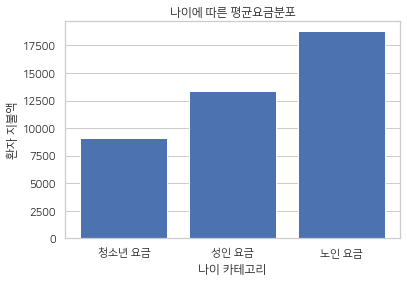

In [ ]:
import matplotlib as mpl
import matplotlib.pylab as plt

avg_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].mean()
avg_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].mean()
avg_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].mean()

med_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].median()
med_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].median()
med_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].median()


avg_data=pd.DataFrame([[avg_ya_charge,avg_sa_charge,avg_e_charge]],columns=['Young Adult','avg_sa_charge','avg_e_charge'])
med_data=pd.DataFrame([[med_ya_charge,med_sa_charge,med_e_charge]],columns=['Young Adult','avg_sa_charge','avg_e_charge'])


plt.title("나이에 따른 평균요금분포")
plt.bar(['청소년 요금','성인 요금','노인 요금'],[avg_ya_charge,avg_sa_charge,avg_e_charge],color='b')
plt.ylabel("환자 지불액")
plt.xlabel("나이 카테고리")
plt.grid(False, axis='x')

plt.show()

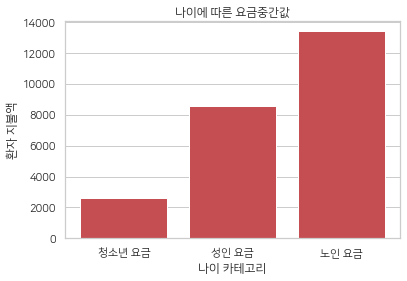

In [ ]:
plt.title("나이에 따른 요금중간값")
plt.bar(['청소년 요금','성인 요금','노인 요금'],[med_ya_charge,med_sa_charge,med_e_charge],color='r')
plt.ylabel("환자 지불액")
plt.xlabel("나이 카테고리")
plt.grid(False, axis='x')

plt.show()

연령별 평균에 누가 더 많이 청구 되었습니까?

환자 부담 평균 : 청소년의 경우 7,944, 노인의 경우 14,785, 노인의 경우 18,795입니다.
환자 요금 중앙값 : 청년은 4,252 명, 노인은 9,565 명, 노인은 13,429 명입니다.
평균 및 중앙값 : 평균이 특이 치의 영향을 받기 쉽기 때문에 때때로 우리는 평균을 사용할 때주의해야합니다.

In [ ]:
df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "저체중"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "정상체중"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "과체중"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "비만"

df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,과체중
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,비만
2,28,male,33.000,3,no,southeast,4449.46200,Senior Adult,비만
3,33,male,22.705,0,no,northwest,21984.47061,Senior Adult,정상체중
4,32,male,28.880,0,no,northwest,3866.85520,Senior Adult,과체중


BMI를 범주 형 변수로 전환 :
저체중 : 체질량 지수 (BMI) <18.5
정상 체중 : 체질량 지수 (BMI) ≥ 18.5 및 체질량 지수 (BMI) <24.9
과체중 : 체질량 지수 (BMI) ≥ 25 및 체질량 지수 (BMI) <29.9
비만 : 체질량 지수 (BMI)> 30

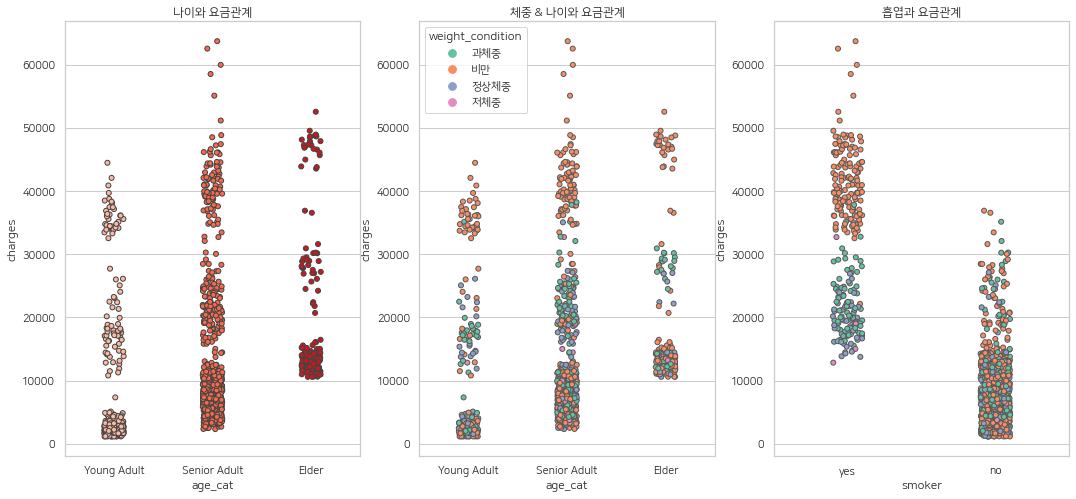

In [ ]:

f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("나이와 요금관계")


sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("체중 & 나이와 요금관계")

sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("흡엽과 요금관계")

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
plt.rc('font', family='NanumGothicOTF') # For MacOS
#plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

['NanumGothicOTF']


findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


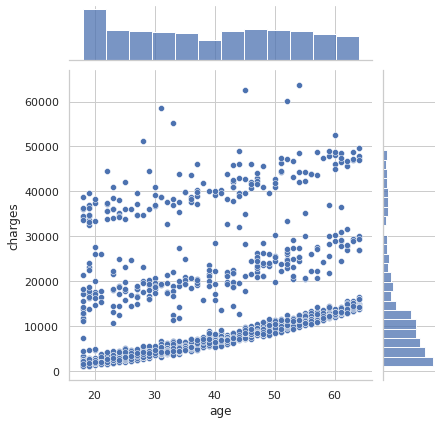

In [ ]:
sns.jointplot(x=df["age"], y=df["charges"], kind='scatter')

무게 상태와 요금
과체중 : 다른 과체중 그룹보다 더 많이 청구되는 두 그룹의 사람들이 있음을 주목하십시오.
비만 : 비만 그룹도 마찬가지입니다. 중요한 그룹은 다른 그룹보다 더 많이 청구됩니다.

Text(0.5, 1.0, 'Smokers')

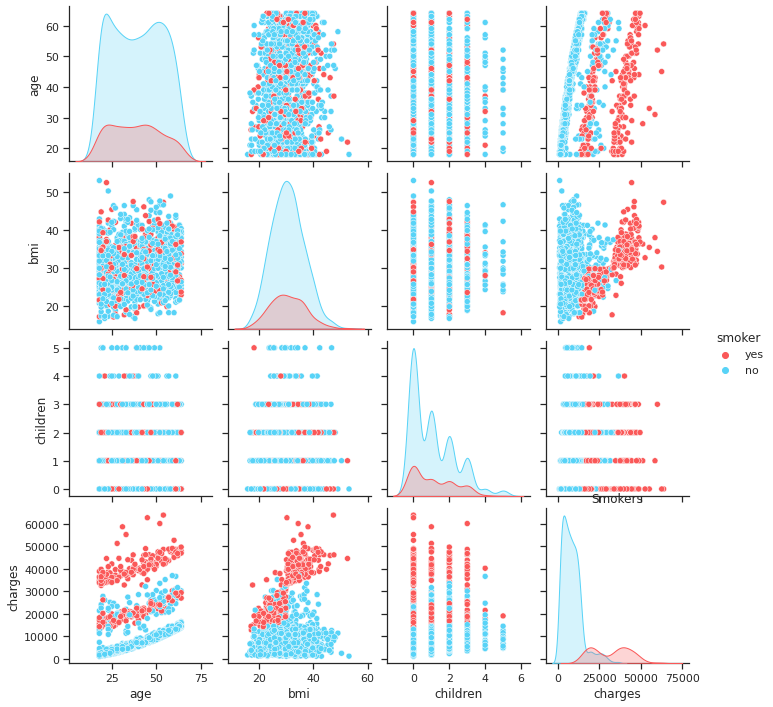

In [ ]:
import seaborn as sns
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

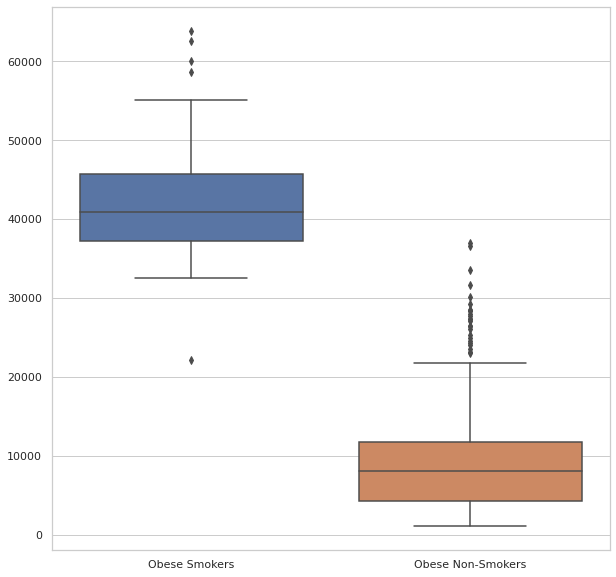

In [ ]:
chargedist_sm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")].values
chargedist_nsm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")].values

#data = pd.DataFrame([[data3]], columns = ['Young Adult', 'Senior Adult', 'Elde'], dtype = float)
datae2 = pd.DataFrame([chargedist_sm, chargedist_nsm])
datae3 = datae2.T
datae3.columns = ["Obese Smokers","Obese Non-Smokers"]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
sns.boxplot(data=data3)
#data3.boxplot()


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior Adult,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,Overweight


비만 흡연자 분포 : 대부분의 비만 흡연자는 의료비로 약 4 만 달러를 지불합니다!
비만 비 흡연자 분포 : 대부분의 비만 비 흡연자는 의료비로 8k를 지불합니다.
흡연은 의료비와 관련하여 비만 환자에게 확실히 큰 요소입니다. 30k 이상의 차이!

비만 흡연자와 비비 만 흡연자 간의 요금 분리
이 차트에서 비만 흡연자와 비만 비 흡연자를 서로 다른 그룹으로 분리하는 방법을 시각화 할 수 있습니다. 따라서 흡연은 환자의 혐의에 확실히 영향을 미치는 특성이라고 말할 수 있습니다.

In [ ]:
a={'Obese':4,'Overweight':3,'Normal Weight':2,'Underweight':1}
x_f = df.iloc[:, -1]
y_f = x_f.replace(a)
y_f

0       3
1       4
2       4
3       2
4       3
       ..
1333    4
1334    4
1335    4
1336    3
1337    3
Name: weight_condition, Length: 1338, dtype: int64

In [ ]:
df2 = pd.concat([df, y_f], axis=1)

수동으로 클러스터링 수행 :
첫 번째 플롯에서는 수동 형식으로 군집 분석을 수행하고 눈이 무엇을 발견 할 수 있는지 확인합니다. 다음은 수행 된 수동 군집 분석 결과입니다.
연령 및 요금 : 환자의 나이에 따라 요금이 약간 증가하는 것을 볼 수 있습니다.
비만 군집 : 각 연령 그룹에 대해 요금의 상단 부분에 비만 군집이 있음을 알 수 있습니다.
이 클러스터는 흡연자입니까? 오른쪽 차트에서 볼 수 있듯이이 클러스터의 대부분은 확실히 흡연자입니다.
이것은 이전 섹션에서 살펴본 것과 다소 동일하지만,이 가변 환자의 요금이 어느 정도인지 확인하기 위해 연령 계수를 추가하고 싶었습니다. 그럼에도 불구하고 우리는 여전히 비만과 흡연자가 적어도 비만 및 과체중 환자 그룹의 주요 요인임을 확인할 수 있습니다.


체중 조건과 흡연 상태의 조합에 연령 계수를 추가 한 Bhumika Bhatt에게 감사드립니다.

Text(17, 40000, '다른 체중조건에 따른 \n 흡연의 영향 ')

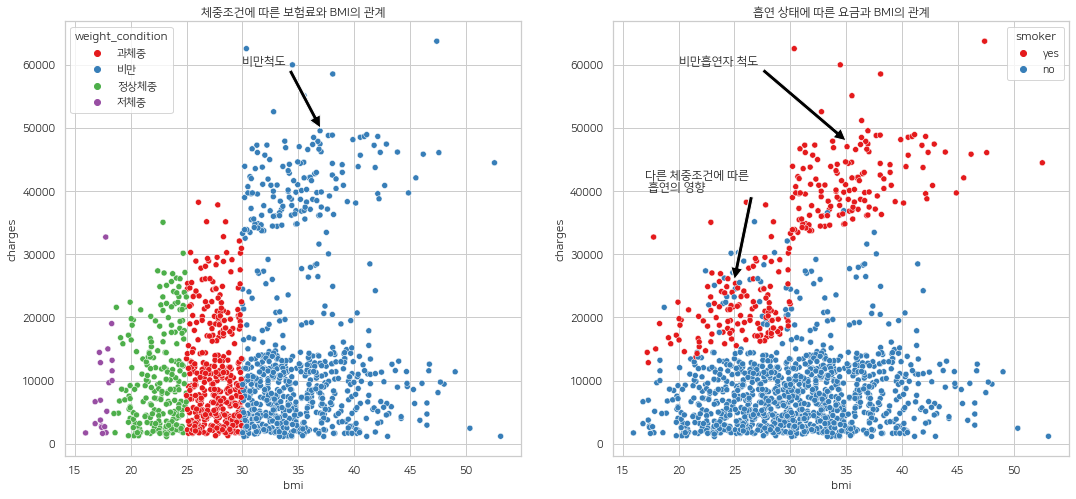

In [ ]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="weight_condition", data=df, palette="Set1", ax=ax1)
ax1.set_title("체중조건에 따른 보험료와 BMI의 관계")
ax1.annotate('비만척도 ', xy=(37, 50000), xytext=(30, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette="Set1", ax=ax2)
ax2.set_title("흡연 상태에 따른 요금과 BMI의 관계")
ax2.annotate('비만흡연자 척도 ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax2.annotate('다른 체중조건에 따른 \n 흡연의 영향 ', xy=(25, 26000), xytext=(17, 40000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)

Data Preparation for ML model

In [ ]:
original_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
original_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
original_df.sex.unique()
original_df['sex'] = original_df['sex'].replace(('female', 'male'), (1, 2))

original_df['smoker'] = original_df['smoker'].replace(('yes', 'no'), (2, 1))
original_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,southwest,16884.92400
1,18,2,33.770,1,1,southeast,1725.55230
2,28,2,33.000,3,1,southeast,4449.46200
3,33,2,22.705,0,1,northwest,21984.47061
4,32,2,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [ ]:
original_df.region.unique()
original_df['region'] = original_df['region'].replace(('southeast', 'southwest', 'northwest', 'northeast'), (2, 1, 1, 1))

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
new_data = pd.read_csv('/content/insurance.csv')
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
new_data['age_cat'] = np.nan
lst = [new_data]


for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'


label = new_data["age_cat"].unique().tolist()
amount = new_data["age_cat"].value_counts().tolist()

new_data

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


In [ ]:
new_data["weight_condition"] = np.nan
lst = [new_data]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"

new_data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Young Adult,Overweight


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# sex column ['female', 'male']->[0, 1] 변환
new_data.sex.unique()
new_data['sex'] = new_data['sex'].replace(('female', 'male'), (0, 1))

# smoke column ['yes', 'no']->[2, 1] 변환
new_data['smoker'] = new_data['smoker'].replace(('yes', 'no'), (2, 1))

new_data

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,0,27.900,0,2,southwest,16884.92400,Young Adult,Overweight
1,18,1,33.770,1,1,southeast,1725.55230,Young Adult,Obese
2,28,1,33.000,3,1,southeast,4449.46200,Young Adult,Obese
3,33,1,22.705,0,1,northwest,21984.47061,Young Adult,Normal Weight
4,32,1,28.880,0,1,northwest,3866.85520,Young Adult,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,northwest,10600.54830,Senior Adult,Obese
1334,18,0,31.920,0,1,northeast,2205.98080,Young Adult,Obese
1335,18,0,36.850,0,1,southeast,1629.83350,Young Adult,Obese
1336,21,0,25.800,0,1,southwest,2007.94500,Young Adult,Overweight


In [ ]:
region_dummies = pd.get_dummies(new_data['region'])
region_dummies.head(10)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [ ]:
# insurance_data에 region_dummies 결합 및 기존 region 열 삭제
new_data = pd.concat([new_data, region_dummies], axis = 1)
new_data.drop(['region'], axis = 1, inplace = True)

# age_cat 원-핫 인코딩

new_data['age_cat'].unique()
age_cat_dummies = pd.get_dummies(new_data['age_cat'])

new_data = pd.concat([new_data, age_cat_dummies], axis = 1)
new_data.drop(['age_cat'], axis = 1, inplace = True)

new_data.head()

,age,sex,bmi,children,smoker,charges,weight_condition,northeast,northwest,southeast,southwest,Elder,Senior Adult,Young Adult
0,19,0,27.900,0,2,16884.92400,Overweight,0,0,0,1,0,0,1
1,18,1,33.770,1,1,1725.55230,Obese,0,0,1,0,0,0,1
2,28,1,33.000,3,1,4449.46200,Obese,0,0,1,0,0,0,1
3,33,1,22.705,0,1,21984.47061,Normal Weight,0,1,0,0,0,0,1
4,32,1,28.880,0,1,3866.85520,Overweight,0,1,0,0,0,0,1


In [ ]:
# weight_condition열 삭제

# weight_condition 원-핫 인코딩

new_data['weight_condition'].unique()
age_cat_dummies = pd.get_dummies(new_data['weight_condition'])

new_data = pd.concat([new_data, age_cat_dummies], axis = 1)
new_data.drop(['weight_condition'], axis = 1, inplace = True)

new_data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,Elder,Senior Adult,Young Adult,Normal Weight,Obese,Overweight,Underweight
0,19,0,27.900,0,2,16884.92400,0,0,0,1,0,0,1,0,0,1,0
1,18,1,33.770,1,1,1725.55230,0,0,1,0,0,0,1,0,1,0,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0,0,0,1,0,1,0,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0,0,0,1,1,0,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0,0,0,1,0,0,1,0


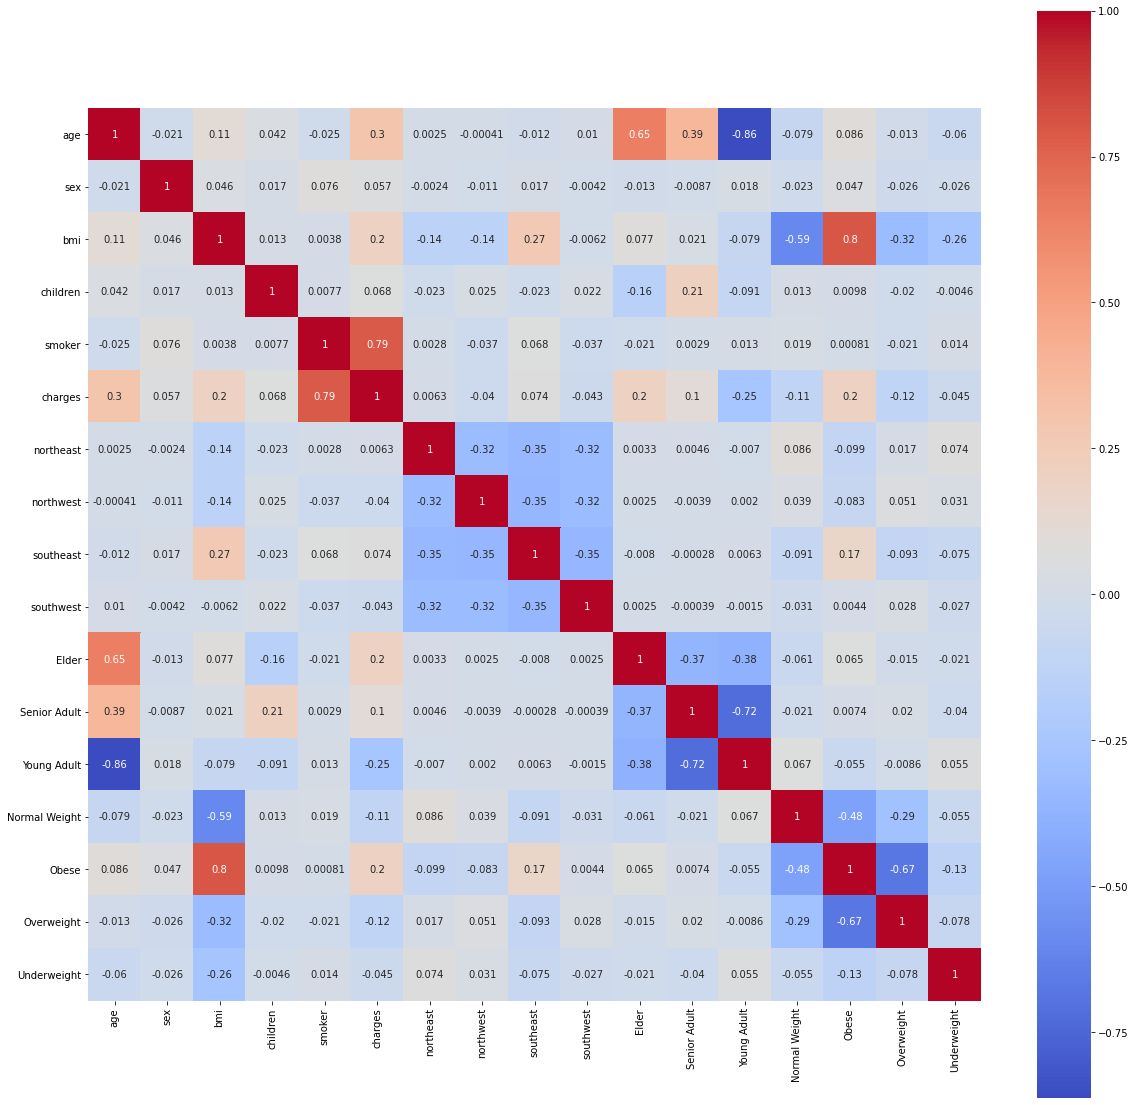

In [ ]:
plt.figure(figsize=(20,20))
p = sns.heatmap(new_data.corr(),cmap="coolwarm",annot=True, square =True)

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(new_data[column].values, 25)
  quantile_75 = np.percentile(new_data[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight

  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight

  outlier_idx = new_data[column][ (new_data[column] < lowest) | (new_data[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=new_data, column='charges', weight=1.5)
new_data.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
y = new_data['charges']
x = new_data.drop(['charges'], axis = 1)
print(x.shape)
print(x.columns)


(1199, 16)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest',
       'southeast', 'southwest', 'Elder', 'Senior Adult', 'Young Adult',
       'Normal Weight', 'Obese', 'Overweight', 'Underweight'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

선형 회귀 모델 적용 ¶
하나 이상의 독립 변수와 종속 변수 사이의 관계 찾기

선형 모델을 검증하기 위해 적절하거나 그렇지 않은 경우 네 가지 가정을 테스트해야합니다. 가정 :

선형성 : 종속 변수와 독립 변수 간의 관계는 선형이어야합니다. 이는 두 변수의 추세가 증가하거나 감소해야 함을 의미합니다.
동질성 : 통계적 측면에서 모든 변수의 분산은 동일합니다.
독립성 : 모든 관찰은 서로 독립적이어야합니다.
정규성 : 모든 변수는 정규 분포를 따라야합니다.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)


R 제곱 (r2) 점수 :
일반적으로 모델이 얼마나 좋은지 결정하는 데 사용됩니다. (독립 및 종속 대상 기능의 상관 관계)

평균 제곱근 오차 (RMSE)
실제 값과 예측 값의 차이 평균의 제곱근입니다.

In [ ]:
# checking model accuracy
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr_r2_score = r2_score(y_test, y_predict)
print('R square Score = ', round(lr_r2_score, 3))

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))

R square Score =  0.8
Root Mean Squared Error =  5639.396


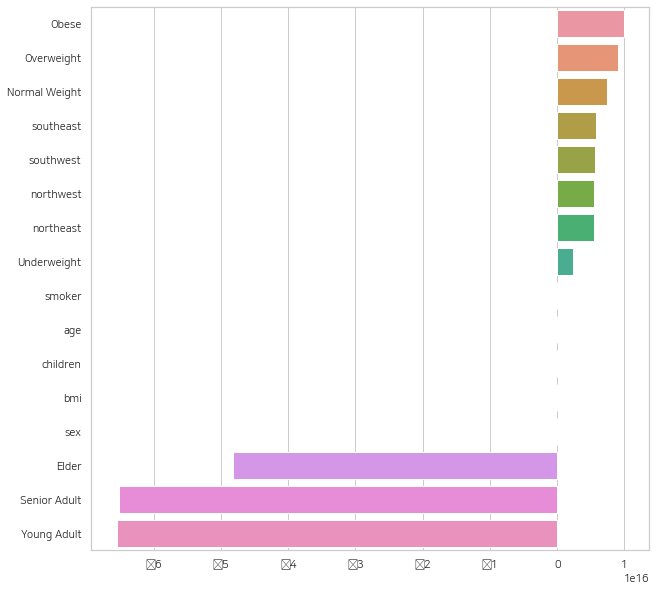

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 학습된 모델의 회귀 계수 확인하기
plt.figure(figsize=(10,10))
coef = pd.Series(model.coef_,index=x.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
new_data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,Elder,Senior Adult,Young Adult,Normal Weight,Obese,Overweight,Underweight
0,19,0,27.900,0,2,16884.92400,0,0,0,1,0,0,1,0,0,1,0
1,18,1,33.770,1,1,1725.55230,0,0,1,0,0,0,1,0,1,0,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0,0,0,1,0,1,0,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0,0,0,1,1,0,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
new_data.drop(['Young Adult'], axis = 1, inplace = True)
new_data.drop(['Senior Adult'], axis = 1, inplace = True)
new_data.drop(['Elder'], axis = 1, inplace = True)

In [ ]:
new_data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,Normal Weight,Obese,Overweight,Underweight
0,19,0,27.900,0,2,16884.92400,0,0,0,1,0,0,1,0
1,18,1,33.770,1,1,1725.55230,0,0,1,0,0,1,0,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0,0,1,0,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0,1,0,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0,0,0,1,0


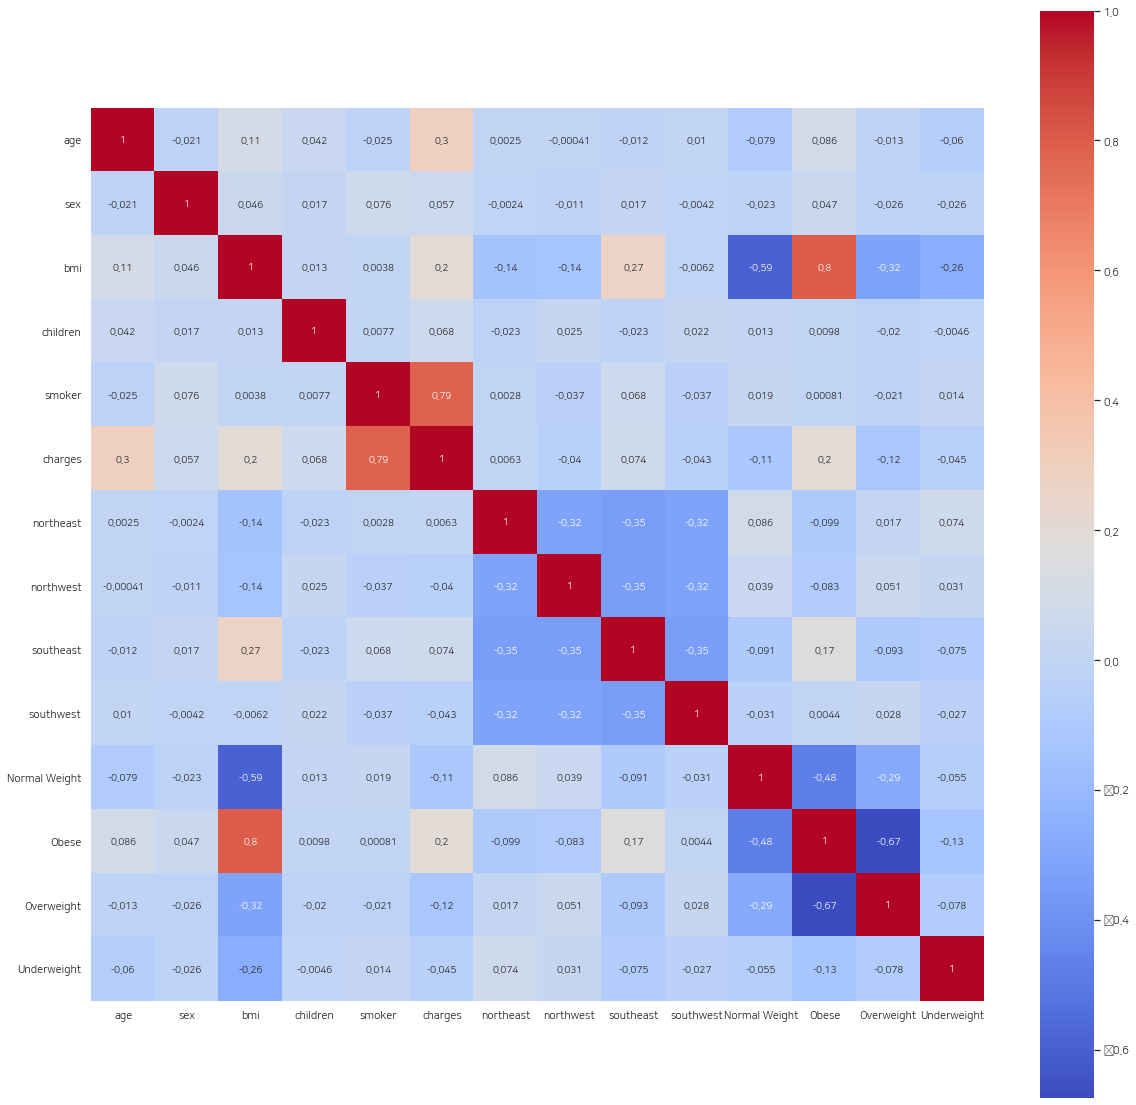

In [ ]:
plt.figure(figsize=(20,20))
p = sns.heatmap(new_data.corr(),cmap="coolwarm",annot=True, square =True)

In [ ]:
new_data["smoker_obese"]=new_data["Obese"]+new_data["smoker"]
new_data.corrwith(new_data["charges"])

age              0.437642
sex             -0.024358
bmi             -0.066495
children         0.083713
smoker           0.602220
charges          1.000000
northeast        0.063953
northwest        0.035171
southeast       -0.028649
southwest       -0.070884
Normal Weight    0.024601
Obese           -0.083990
Overweight       0.074783
Underweight     -0.019354
smoker_obese     0.292934
dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

#LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

# checking model accuracy
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr_r2_score = r2_score(y_test, y_predict)
print('R square Score = ', round(lr_r2_score, 3))

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))


R square Score =  0.614
Root Mean Squared Error =  4362.693


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
score = cross_val_score(model, x, y, cv=5)
print(score)


[0.67017794 0.47873359 0.65678122 0.56981585 0.61880111]


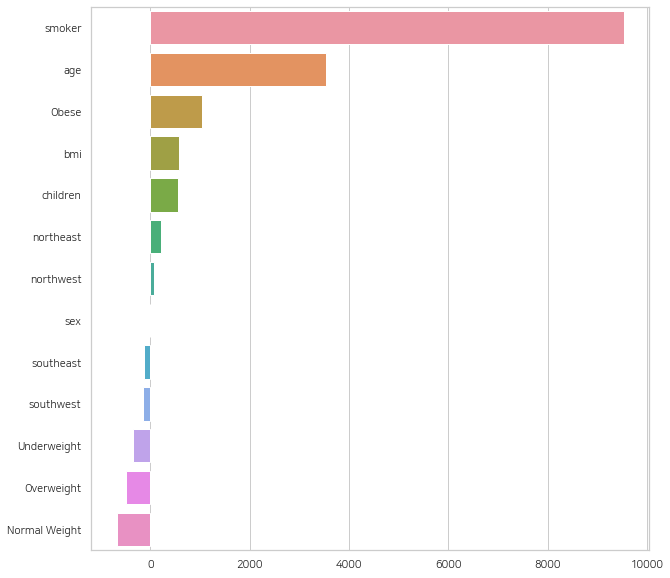

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 학습된 모델의 회귀 계수 확인하기
plt.figure(figsize=(10,10))
coef = pd.Series(model.coef_,index=x.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_log = np.log1p(y)
# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
x_train,x_test,y_train,y_test = train_test_split(x,y_log,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression

#LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

# checking model accuracy
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lr_r2_score = r2_score(y_test, y_predict)
print('R square Score = ', round(lr_r2_score, 3))

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))

R square Score =  0.786
Root Mean Squared Error =  0.424


In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

y_predict_rf = rf_model.predict(x_test)

# checking model accuracy
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
rf_r2_score = r2_score(y_test, y_predict_rf)
print('R square Score = ', round(rf_r2_score, 3))

rf_mse = mean_squared_error(y_test, y_predict_rf)
rf_rmse = np.sqrt(rf_mse)
print('Root Mean Squared Error = ', round(rf_rmse, 3))

R square Score =  0.878
Root Mean Squared Error =  4410.873


In [ ]:
#Gradient Boosting Regressor Model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

gb_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gb_model.fit(x_train, y_train)

y_predict_gb = gb_model.predict(x_test)

# checking model accuracy
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
gb_r2_score = r2_score(y_test, y_predict_gb)
print('R square Score = ', round(gb_r2_score, 3))

gb_mse = mean_squared_error(y_test, y_predict_gb)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_gb)),'.3f'))
MSE = mean_squared_error(y_test, y_predict_gb)
MAE = mean_absolute_error(y_test, y_predict_gb)

print('RMSE =',RMSE,
      '\nMSE =',MSE,
      '\nMAE =',MAE)

R square Score =  0.901
Root Mean Squared Error =  3976.268
RMSE = 3976.268 
MSE = 15810703.606736243 
MAE = 2427.203480782808


In [ ]:
#Ensembles of Model
# # Average three model (Linear Regression, RF and Gradient Boosting)
avg_model = (y_predict + y_predict_rf + y_predict_gb) /3

# checking model accuracy
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, avg_model)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))

r2_score = r2_score(y_test, avg_model)
print('R square Score = ', round(r2_score, 3))


Root Mean Squared Error =  4266.802
R square Score =  0.886


In [ ]:
#교차검증
from sklearn.model_selection import cross_val_score
score = cross_val_score(gb_model, x, y, cv=5)
print(score)

[0.88528398 0.80688591 0.89100843 0.85119331 0.86315304]


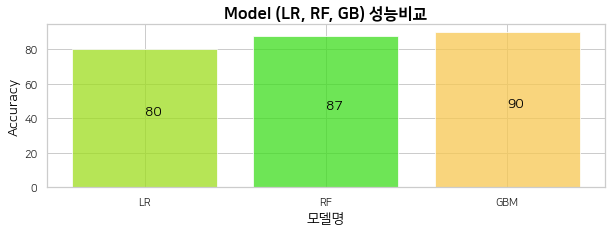

In [ ]:
#모델비교
# import numpy as np
# import matplotlib.pyplot as plt


r2_scores = [lr_r2_score*100, rf_r2_score*100, gb_r2_score*100]
model_names = ['LR', 'RF', 'GBM']

total_bar = np.arange(len(model_names))
color = ['#9edd1d', '#3edd1d', '#f7c851']

fig, ax = plt.subplots(figsize=(10, 3))
bar = plt.bar(model_names, r2_scores, align='center', alpha=.75, color=color)
plt.xticks(total_bar, model_names)
plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('모델명',fontsize=14, color='black')
plt.title('Model (LR, RF, GB) 성능비교', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')

autolabel(bar)

plt.show()


새로운 모델

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   region            1338 non-null   int64  
 6   charges           1338 non-null   float64
 7   age_cat           1338 non-null   object 
 8   weight_condition  1338 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 94.2+ KB


In [ ]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,1,27.90,0,2,1,16884.9240,Young Adult,Overweight
1,18,2,33.77,1,1,2,1725.5523,Young Adult,Obese
2,28,2,33.00,3,1,2,4449.4620,Young Adult,Obese


In [ ]:
df.age_cat.unique()
# df['age_cat'] = df['age_cat'].replace(('Young Adult', 'Senior Adult', 'Elder'), (1, 2, 3))

df['weight_condition'] = df['weight_condition'].replace(('Obese', 'Overweight', 'Normal Weight', 'Underweight'), (4,3,2,1))

df

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_condition
0,19,1,27.900,0,2,1,16884.92400,1,3
1,18,2,33.770,1,1,2,1725.55230,1,4
2,28,2,33.000,3,1,2,4449.46200,1,4
3,33,2,22.705,0,1,1,21984.47061,1,2
4,32,2,28.880,0,1,1,3866.85520,1,3
...,...,...,...,...,...,...,...,...,...
1333,50,2,30.970,3,1,1,10600.54830,2,4
1334,18,1,31.920,0,1,1,2205.98080,1,4
1335,18,1,36.850,0,1,2,1629.83350,1,4
1336,21,1,25.800,0,1,1,2007.94500,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   region            1338 non-null   int64  
 6   charges           1338 non-null   float64
 7   age_cat           1338 non-null   int64  
 8   weight_condition  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [ ]:
y = df['charges']
x = df.drop(['charges'], axis = 1)
print(x.shape)
print(x.columns)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Gradient Boosting Regressor Model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

gb_model = GradientBoostingRegressor(max_depth=4, n_estimators=100, learning_rate =.1)
gb_model.fit(x_train, y_train)

y_predict_gb = gb_model.predict(x_test)

# checking model accuracy
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
gb_r2_score = r2_score(y_test, y_predict_gb)
print('R square Score = ', round(gb_r2_score, 3))

gb_mse = mean_squared_error(y_test, y_predict_gb)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_gb)),'.3f'))
MSE = mean_squared_error(y_test, y_predict_gb)
MAE = mean_absolute_error(y_test, y_predict_gb)

print('RMSE =',RMSE,
      '\nMSE =',MSE,
      '\nMAE =',MAE)

(1338, 8)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'age_cat',
       'weight_condition'],
      dtype='object')
R square Score =  0.881
Root Mean Squared Error =  4351.787
RMSE = 4351.787 
MSE = 18938047.44230626 
MAE = 2531.5045665286325


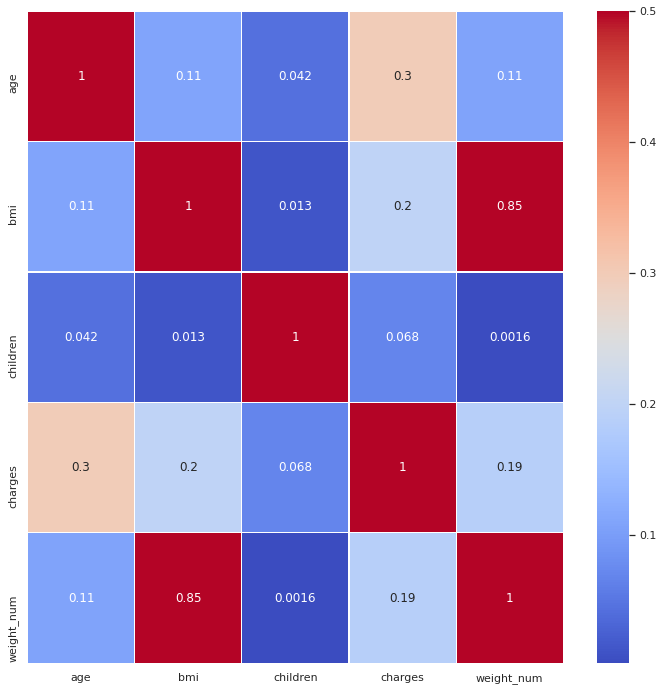

In [ ]:
# 객체간 연관
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df3.corr(),linewidths=0.1,vmax=0.5, cmap="coolwarm", linecolor='white', annot=True)
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# 모델 정의
model = Sequential()
model.add(Dense(50,input_dim=9))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(324))
model.add(Activation('linear'))
model.add(Dropout(0.5))
model.add(Dense(120))
model.add(Activation('linear'))
model.add(Dropout(0.3))
model.add(Dense(1))
# 모델 컴파일
model.compile(loss='mse',optimizer='adam')

# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                500       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_5 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 324)               16524     
_________________________________________________________________
activation_6 (Activation)    (None, 324)              